In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## IN EACH OF THE ALGORITHMS REGRET HAS BEEN PLOTTED WITH TOTAL NUMBER OF PULLS

## 1. EXPLORE THEN COMMIT WITH DELTA KNOWN

In [23]:
#Taking Normal distribution
k=2
n_iter=100
mu = np.array([2,3])
sigma = np.array([1,2])
delta = abs(mu[0]-mu[1])

In [24]:
def etc_known(n):
    trev = np.zeros(k) #total reward
    arm_pull = np.zeros(k) #number of times each arm is pulled
    m = max(1,math.ceil((4/(delta**2))*math.log((n*delta**2)/4)))
    #Exploration
    for t in range(m):
        for i in range(k):
            rev = mu[i]+sigma[i]*np.random.randn()
            trev[i] += rev
            arm_pull[i] += 1
    #Exploitation
    for t in range(n-m*k):
        a = np.argmax(trev)
        rev = mu[a]+sigma[a]*np.random.randn()
        trev[a] += rev
        arm_pull[a] +=1
    regret=0
    for i in range(k):
        regret += abs(max(mu)-mu[i])*(arm_pull[i]/n)
    return regret

In [25]:
regret = np.zeros(n_iter-k+1)
iters = [i for i in range(k,n_iter+1)]
for i in range(n_iter-k+1):
    regret[i] += etc_known(i+k)
    print("Regret for pulls  "+str(i+k)+" is "+str(regret[i]))

Regret for pulls  2 is 0.5
Regret for pulls  3 is 0.6666666666666666
Regret for pulls  4 is 0.25
Regret for pulls  5 is 0.2
Regret for pulls  6 is 0.3333333333333333
Regret for pulls  7 is 0.42857142857142855
Regret for pulls  8 is 0.375
Regret for pulls  9 is 0.5555555555555556
Regret for pulls  10 is 0.4
Regret for pulls  11 is 0.45454545454545453
Regret for pulls  12 is 0.4166666666666667
Regret for pulls  13 is 0.38461538461538464
Regret for pulls  14 is 0.42857142857142855
Regret for pulls  15 is 0.4
Regret for pulls  16 is 0.375
Regret for pulls  17 is 0.35294117647058826
Regret for pulls  18 is 0.3888888888888889
Regret for pulls  19 is 0.3684210526315789
Regret for pulls  20 is 0.35
Regret for pulls  21 is 0.3333333333333333
Regret for pulls  22 is 0.3181818181818182
Regret for pulls  23 is 0.30434782608695654
Regret for pulls  24 is 0.3333333333333333
Regret for pulls  25 is 0.32
Regret for pulls  26 is 0.3076923076923077
Regret for pulls  27 is 0.7037037037037037
Regret for p

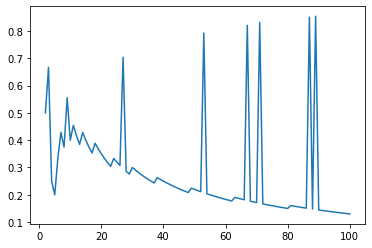

In [26]:
plt.plot(iters,regret)
plt.show()

## 2. EXPLORE THEN COMMIT WITH DELTA NOT KNOWN

In [27]:
n_iter = 100
k = 5
mu = np.array([2,3,1,2,5])
sigma = np.array([1,2,1,0.5,1])

In [28]:
def etc_unknown(n):
    trev = np.zeros(k)
    arm_pull = np.zeros(k)
    delta = 2/math.sqrt(n)
    m = max(1,math.ceil((4/(delta**2))*math.log((n*delta**2)/4)))
    #Exploration
    for t in range(m):
        for i in range(k):
            rev = mu[i]+sigma[i]*np.random.randn()
            trev[i] += rev
            arm_pull[i] += 1
    #Exploitation
    for t in range(n-m*k):
        a = np.argmax(trev)
        rev = mu[a]+sigma[a]*np.random.randn()
        trev[a] += rev
        arm_pull[a] +=1
    regret=0
    arm_star = np.argmax(mu)
    for i in range(k):
        if(i!=arm_star):
            regret += delta*(arm_pull[i]/n)
    return regret

In [29]:
regret = np.zeros(n_iter-k+1)
iters = [i for i in range(k,n_iter+1)]
for i in range(n_iter-k+1):
    regret[i] += etc_unknown(i+k)
    print("Regret for pulls  "+str(i+k)+" is "+str(regret[i]))

Regret for pulls  5 is 0.7155417527999327
Regret for pulls  6 is 0.5443310539518174
Regret for pulls  7 is 0.6479390965872465
Regret for pulls  8 is 0.35355339059327373
Regret for pulls  9 is 0.2962962962962963
Regret for pulls  10 is 0.5692099788303082
Regret for pulls  11 is 0.2192809778747372
Regret for pulls  12 is 0.529237746757157
Regret for pulls  13 is 0.51203095036175
Regret for pulls  14 is 0.1527207096642425
Regret for pulls  15 is 0.13770607453181924
Regret for pulls  16 is 0.125
Regret for pulls  17 is 0.11413441178180375
Regret for pulls  18 is 0.44521538074708555
Regret for pulls  19 is 0.09659609847181547
Regret for pulls  20 is 0.42485291572496003
Regret for pulls  21 is 0.41565312425903317
Regret for pulls  22 is 0.07752753322022198
Regret for pulls  23 is 0.3988971399352735
Regret for pulls  24 is 0.06804138174397717
Regret for pulls  25 is 0.38400000000000006
Regret for pulls  26 is 0.060343426196364326
Regret for pulls  27 is 0.05702224880885193
Regret for pulls  2

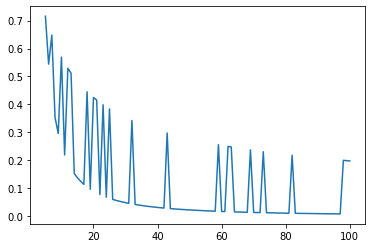

In [30]:
plt.plot(iters,regret)
plt.show()

## 3.  UPPER CONFIDENCE BOUND WITH HORIZON KNOWN

In [31]:
n_iter = 100
k = 5
mu = np.array([2,3,1,2,5])
sigma = np.array([1,2,1,0.5,1])

In [32]:
def UCB_known(n):
    trev = np.zeros(k) #totol reward
    arm_pull = np.zeros(k) #number of times each arm is pulled
    #Each arm once 
    for i in range(k):
        rev = mu[i]+sigma[i]*np.random.randn()
        trev[i] += rev
        arm_pull[i] += 1
    sm = trev+0 #mean reward
    ucb = sm+math.sqrt(2*math.log(k))
    #UCB ESTIMATE
    for t in range(k,n):
        a = np.argmax(ucb)
        rev = mu[a]+sigma[a]*np.random.randn()
        trev[a] += rev
        arm_pull[a] +=1
        sm[a] = trev[a]/arm_pull[a]
        ucb[a] = sm[a]+math.sqrt((2*math.log(t))/arm_pull[a])
        
    regret=0
    for i in range(k):
        regret += abs(max(mu)-mu[i])*(arm_pull[i]/n)
    return regret

In [33]:
regret = np.zeros(n_iter-k+1)
iters = [i for i in range(k,n_iter+1)]
for i in range(n_iter-k+1):
    regret[i] = UCB_known(i+k)
    print("Regret for pulls  "+str(i+k)+" is "+str(regret[i]))

Regret for pulls  5 is 2.4000000000000004
Regret for pulls  6 is 2.0
Regret for pulls  7 is 2.0
Regret for pulls  8 is 1.5
Regret for pulls  9 is 1.5555555555555554
Regret for pulls  10 is 1.2000000000000002
Regret for pulls  11 is 1.4545454545454544
Regret for pulls  12 is 1.0
Regret for pulls  13 is 1.153846153846154
Regret for pulls  14 is 1.0
Regret for pulls  15 is 0.8
Regret for pulls  16 is 0.75
Regret for pulls  17 is 0.7058823529411764
Regret for pulls  18 is 0.6666666666666666
Regret for pulls  19 is 0.631578947368421
Regret for pulls  20 is 0.7000000000000001
Regret for pulls  21 is 0.5714285714285714
Regret for pulls  22 is 0.5454545454545454
Regret for pulls  23 is 0.5217391304347826
Regret for pulls  24 is 0.5
Regret for pulls  25 is 0.6
Regret for pulls  26 is 0.5384615384615385
Regret for pulls  27 is 0.4444444444444444
Regret for pulls  28 is 0.5714285714285714
Regret for pulls  29 is 0.48275862068965514
Regret for pulls  30 is 0.4
Regret for pulls  31 is 0.38709677419

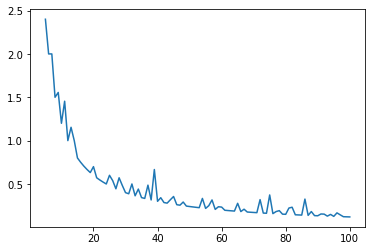

In [34]:
plt.plot(iters,regret)
plt.show()

## 4. UPPER CONFIDENCE WITH DOUBLING TRICK AND HORIZON UNKNOWN

In [36]:
k = 5
mu = np.array([2,3,1,2,5])
sigma = np.array([1,2,1,0.5,1])
h = 10 #horizons

In [37]:
def UCB_unknown(h):
    n=0
    trev = np.zeros(k)
    arm_pull = np.zeros(k)
    #Each arm once 
    for i in range(k):
        rev = mu[i]+sigma[i]*np.random.randn()
        trev[i] += rev
        arm_pull[i] += 1
        n +=1
    sm = trev/1 #sample mean
    ucb = sm+math.sqrt(4*math.log(n))
    #UCB ESTIMATE
    for i in range(h):
        for t in range(2**i):
            a = np.argmax(ucb)
            rev = mu[a]+sigma[a]*np.random.randn()
            trev[a] += rev
            arm_pull[a] +=1
            sm[a] = trev[a]/arm_pull[a]
            n+=1
            ucb[a] = sm[a]+math.sqrt((4*math.log(n))/arm_pull[a])
            
    regret=0
    for i in range(k):
        regret += abs(max(mu)-mu[i])*(arm_pull[i]/n)
    return regret,n

In [38]:
regret = np.zeros(h)
n_pull = np.zeros(h)
iters = [i for i in range(k,n_iter+1)]
for i in range(h):
    regret[i],n_pull[i] = UCB_unknown(i+2)
    print("Regret for pulls  "+str(n_pull[i])+" is "+str(regret[i]))

Regret for pulls  8.0 is 2.0
Regret for pulls  12.0 is 1.0
Regret for pulls  20.0 is 1.25
Regret for pulls  36.0 is 0.38888888888888884
Regret for pulls  68.0 is 0.3382352941176471
Regret for pulls  132.0 is 0.10606060606060608
Regret for pulls  260.0 is 0.08076923076923077
Regret for pulls  516.0 is 0.023255813953488372
Regret for pulls  1028.0 is 0.011673151750972763
Regret for pulls  2052.0 is 0.028752436647173488


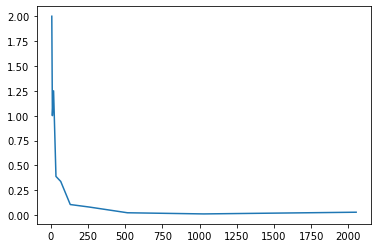

In [39]:
plt.plot(n_pull,regret)
plt.show()

## 5. UPPER CONFIDENCE BOUN CHAPTER 8 WITH ASYMPTOTICALLY OPTIMAL

In [40]:
n_iter = 100
k = 5
mu = np.array([2,3,1,2,5])
sigma = np.array([1,2,1,0.5,1])

In [41]:
def UCB_CHAP8(n):
    trev = np.zeros(k) #totol reward
    arm_pull = np.zeros(k) #number of times each arm is pulled
    #rev = np.zeros(k)
    #Each arm once 
    for i in range(k):
        rev = mu[i]+sigma[i]*np.random.randn()
        trev[i] += rev
        arm_pull[i] += 1
    sm = trev+0 #mean reward
    ucb = sm+math.sqrt(2*math.log(1+k*(math.log(k)**2)))
    #UCB ESTIMATE
    for t in range(k,n):
        a = np.argmax(ucb)
        rev = mu[a]+sigma[a]*np.random.randn()
        trev[a] += rev
        arm_pull[a] +=1
        sm[a] = trev[a]/arm_pull[a]
        ucb[a] = sm[a]+math.sqrt(2*math.log(1+t*(math.log(t)**2)))
        
    regret=0
    for i in range(k):
        regret += abs(max(mu)-mu[i])*(arm_pull[i]/n)
    return regret

In [42]:
regret = np.zeros(n_iter-k+1)
iters = [i for i in range(k,n_iter+1)]
for i in range(n_iter-k+1):
    regret[i] = UCB_known(i+k)
    print("Regret for pulls  "+str(i+k)+" is "+str(regret[i]))

Regret for pulls  5 is 2.4000000000000004
Regret for pulls  6 is 2.0
Regret for pulls  7 is 1.7142857142857142
Regret for pulls  8 is 1.5
Regret for pulls  9 is 1.5555555555555554
Regret for pulls  10 is 1.2000000000000002
Regret for pulls  11 is 1.2727272727272727
Regret for pulls  12 is 1.0
Regret for pulls  13 is 1.076923076923077
Regret for pulls  14 is 1.0
Regret for pulls  15 is 1.0666666666666667
Regret for pulls  16 is 0.75
Regret for pulls  17 is 0.8235294117647058
Regret for pulls  18 is 0.7777777777777777
Regret for pulls  19 is 0.631578947368421
Regret for pulls  20 is 0.6000000000000001
Regret for pulls  21 is 0.6666666666666665
Regret for pulls  22 is 0.5454545454545454
Regret for pulls  23 is 0.5217391304347826
Regret for pulls  24 is 0.5
Regret for pulls  25 is 0.48
Regret for pulls  26 is 0.46153846153846156
Regret for pulls  27 is 0.5925925925925926
Regret for pulls  28 is 0.42857142857142855
Regret for pulls  29 is 0.48275862068965514
Regret for pulls  30 is 0.466666

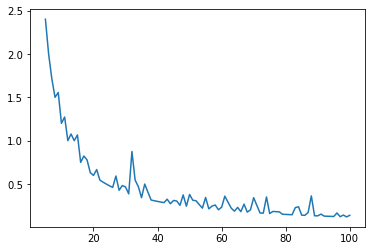

In [43]:
plt.plot(iters,regret)
plt.show()

## 6. THOMSON SAMPLING

### The result can be hoped with to improve with gaussain bandits as there are some implemenation issues

In [16]:
k = 4 #number of arms
n_iter = 200 #total number of rounds
alpha_dist = np.array([1,0.5,0.5,0.25])
beta_dist = np.array([0.75,1,0.5,0.25])
exp = np.zeros(k)
for i in range(0,k):
    exp[i] = alpha_dist[i]/(alpha_dist[i]+beta_dist[i])
mexp = max(exp)

In [20]:
def ts(n):
    
    arm_pull = np.zeros(k)
    alpha = 1 
    beta = 1 
    a_est = np.ones(k)
    b_est = np.ones(k)
    for t in range(n):
        sm = [np.random.beta(a_est[a], b_est[a]) for a in range(k)]
        a = np.argmax(sm,axis=0)
        arm_pull[a] += 1
        if exp[a] > np.random.rand():
            a_est[a] +=1
        else:
            b_est[a] +=1
        #if np.random.beta(alpha_dist[a],beta_dist[a])>0.5:
        #    #rev=1
        #else:
        #    rev=0
        #arm_pull[a] += 1
        #if rev == 1:
        #    alpha += 1
        #else:
        #   beta += 1 
    regret = 0
    for i in range(k):
        regret += abs(mexp-exp[i])*(arm_pull[i]/n)
    return regret

In [23]:
regret = np.zeros(n_iter-k+1)
iters = [i for i in range(k,n_iter+1)]
for i in range(n_iter-k+1):
    regret[i] = ts(i+k)
    print("Regret for pulls  "+str(i+k)+" is "+str(regret[i]))

Regret for pulls  4 is 0.07738095238095237
Regret for pulls  5 is 0.09047619047619046
Regret for pulls  6 is 0.09920634920634917
Regret for pulls  7 is 0.11904761904761901
Regret for pulls  8 is 0.07440476190476189
Regret for pulls  9 is 0.058201058201058184
Regret for pulls  10 is 0.08095238095238093
Regret for pulls  11 is 0.07575757575757575
Regret for pulls  12 is 0.09523809523809522
Regret for pulls  13 is 0.0641025641025641
Regret for pulls  14 is 0.07653061224489793
Regret for pulls  15 is 0.08095238095238093
Regret for pulls  16 is 0.07440476190476189
Regret for pulls  17 is 0.0476190476190476
Regret for pulls  18 is 0.11507936507936506
Regret for pulls  19 is 0.0989974937343358
Regret for pulls  20 is 0.040476190476190464
Regret for pulls  21 is 0.08049886621315192
Regret for pulls  22 is 0.04978354978354976
Regret for pulls  23 is 0.09627329192546581
Regret for pulls  24 is 0.13194444444444442
Regret for pulls  25 is 0.11523809523809521
Regret for pulls  26 is 0.0961538461538

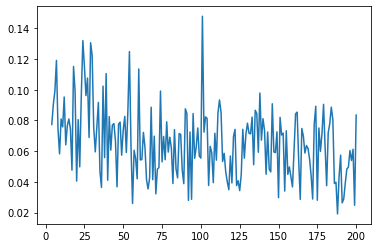

In [24]:
plt.plot(iters,regret)
plt.show()